In [65]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r'Customer_Data.csv')
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count
0,1,26,484196.52,245,1976.312327
1,2,26,27569.00,33,835.424242
2,3,26,108525.00,109,995.642202
3,4,28,96220.50,89,1081.129213
4,5,26,41431.00,18,2301.722222


Text(0, 0.5, 'Total Order Count')

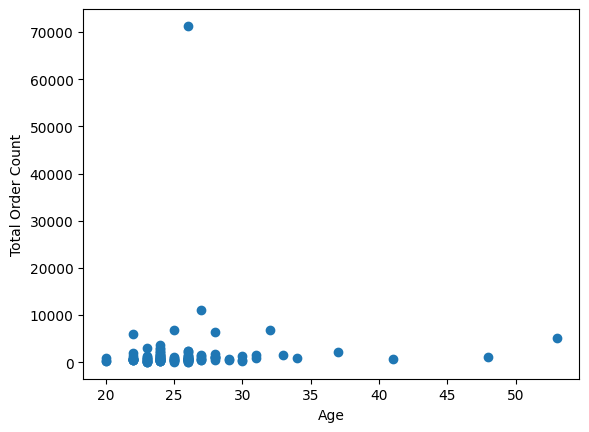

In [67]:
plt.scatter(df.Age,df['Total Order Count'])
plt.xlabel('Age')
plt.ylabel('Total Order Count')

In [68]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Total Order Count']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [69]:
df['cluster']=y_predicted
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count,cluster
0,1,26,484196.52,245,1976.312327,2
1,2,26,27569.00,33,835.424242,2
2,3,26,108525.00,109,995.642202,2
3,4,28,96220.50,89,1081.129213,2
4,5,26,41431.00,18,2301.722222,2


In [70]:
km.cluster_centers_

array([[3.01428571e+01, 6.55915724e+03],
       [2.60000000e+01, 7.12900000e+04],
       [2.55283019e+01, 9.10324974e+02]])

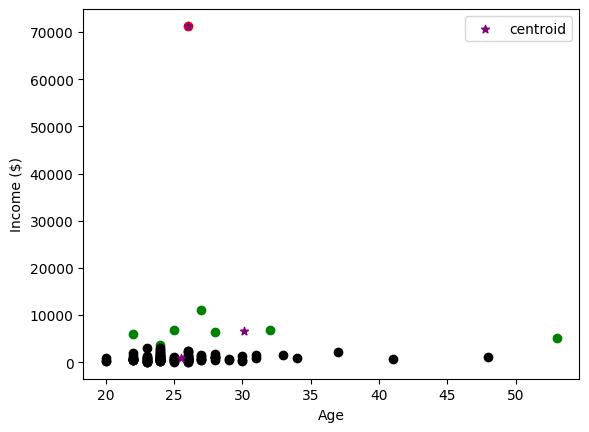

In [71]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
#df4 = df[df.cluster==3]
#df5 = df[df.cluster==4]
plt.scatter(df1.Age,df1['Total Order Count'],color='green')
plt.scatter(df2.Age,df2['Total Order Count'],color='red')
plt.scatter(df3.Age,df3['Total Order Count'],color='black')
#plt.scatter(df4.Age,df4['Total Order Count'],color='yellow')
#plt.scatter(df5.Age,df5['Total Order Count'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [72]:
scaler = MinMaxScaler()

scaler.fit(df[['Total Order Count']])
df['Total Order Count'] = scaler.transform(df[['Total Order Count']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [73]:
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count,cluster
0,1,0.181818,484196.52,245,0.026636,2
1,2,0.181818,27569.00,33,0.010614,2
2,3,0.181818,108525.00,109,0.012864,2
3,4,0.242424,96220.50,89,0.014065,2
4,5,0.181818,41431.00,18,0.031205,2


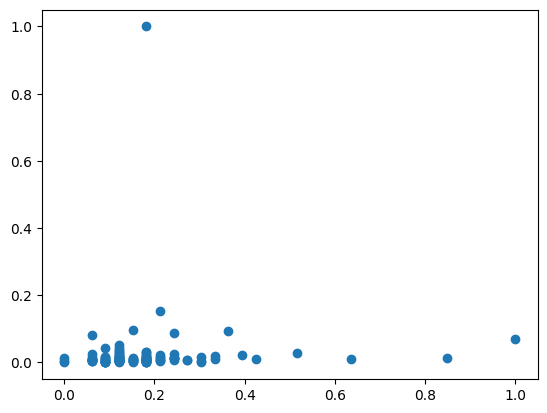

In [74]:
plt.scatter(df.Age,df['Total Order Count'])

In [75]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Total Order Count']])
y_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [76]:
df['cluster']=y_predicted
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count,cluster
0,1,0.181818,484196.52,245,0.026636,0
1,2,0.181818,27569.00,33,0.010614,0
2,3,0.181818,108525.00,109,0.012864,0
3,4,0.242424,96220.50,89,0.014065,0
4,5,0.181818,41431.00,18,0.031205,0


In [77]:
km.cluster_centers_

array([[0.15038233, 0.01605999],
       [0.63636364, 0.0258568 ],
       [0.18181818, 1.        ]])

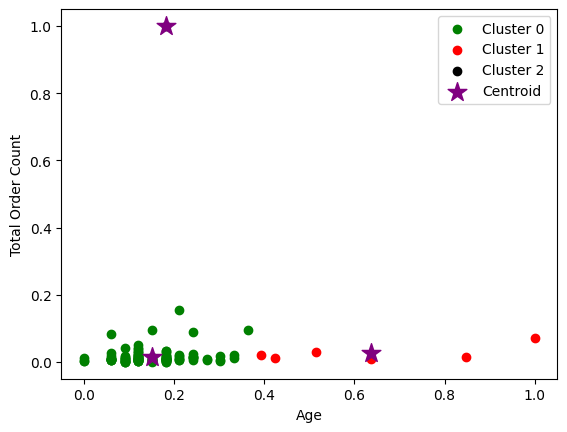

In [78]:
import matplotlib.pyplot as plt

# Assuming you already have clusters 0 through 4 in your dataset
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
#df3 = df[df.cluster == 3]
#df4 = df[df.cluster == 4]

# Plot each cluster with a different color
plt.scatter(df0.Age, df0['Total Order Count'], color='green', label='Cluster 0')
plt.scatter(df1.Age, df1['Total Order Count'], color='red', label='Cluster 1')
plt.scatter(df2.Age, df2['Total Order Count'], color='black', label='Cluster 2')
#plt.scatter(df3.Age, df3['Total Order Count'], color='yellow', label='Cluster 3')
#plt.scatter(df4.Age, df4['Total Order Count'], color='blue', label='Cluster 4')

# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='Centroid')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Total Order Count')
plt.legend()
plt.show()


<h4 style='color:purple'>Elbow Plot</h4>

In [79]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Total Order Count']])
    sse.append(km.inertia_)

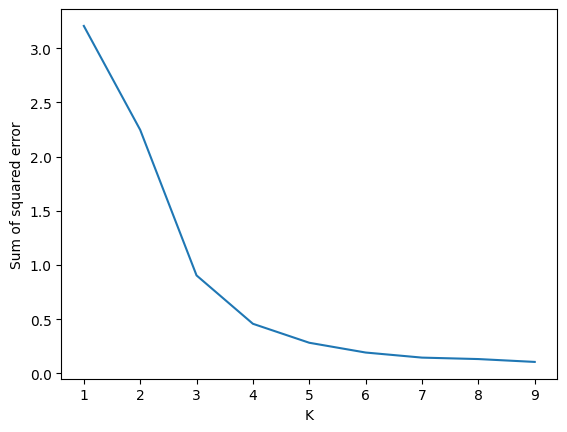

In [80]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)